In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
voice_usage_info = pd.read_csv("data/VOICE_OUTGOING_CALL_USAGE_IDD.csv")

voice_usage_info

,event_source,event_source.hash,call_count,duration (seconds),year month,account_num,account_num.hash,rtom_code,location_code,msan,equp_id,equp_index
0,662246323,a59c2773afc5be902c52f6990f370bcf,1,565,201910,0002144758,771c34ac5cc715fcb165b26fbf100e0c,R-DB,NL-HGW-NODE,MSAG5200-ISL,49128,1
1,112852233,4c4675487bb19a93b735663cce8b33e9,1,226,201911,0001806369,df1e4af0e56cd73433d876aa0bad1a0d,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1
2,662246323,a59c2773afc5be902c52f6990f370bcf,2,1315,202001,0002144758,771c34ac5cc715fcb165b26fbf100e0c,R-DB,NL-HGW-NODE,MSAG5200-ISL,49128,1
3,112852233,4c4675487bb19a93b735663cce8b33e9,3,151,201912,0001806369,df1e4af0e56cd73433d876aa0bad1a0d,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1
4,662246323,a59c2773afc5be902c52f6990f370bcf,2,111,202002,0002144758,771c34ac5cc715fcb165b26fbf100e0c,R-DB,NL-HGW-NODE,MSAG5200-ISL,49128,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,112912121,26a87af2622ab681238a991a2c8ac33c,2,68,202004,0001195079,822f5f61a25cdbedef1fbd6c8c5ee7e2,R-KI,KI-NODE,C300M,1066816,4
2085,662050252,f74cb22c89ace83b0f9feefce6191b0d,1,566,201911,0024081802,53ae8548575967652f586076eb2fb7ae,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1
2086,662050301,a56749c8566f8c41d2c406e0ca8f5ec1,3,200,202002,0022653264,81727df83088cde5a0b9f48d082e1789,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1
2087,662050301,a56749c8566f8c41d2c406e0ca8f5ec1,1,270,202003,0022653264,81727df83088cde5a0b9f48d082e1789,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1


In [3]:
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating Call Count/Duration - bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# User profile dim table
# visualize and analyze data

In [4]:
voice_usage_info = voice_usage_info.drop_duplicates(["event_source.hash","year month"], keep="last")

voice_usage_info.shape

(2089, 12)

In [5]:
voice_usage_info = voice_usage_info.drop(['event_source','account_num'], axis=1)
voice_usage_info.rename(columns={'duration (seconds)': 'duration','year month':'year-month'}, inplace=True)
voice_usage_info

,event_source.hash,call_count,duration,year-month,account_num.hash,rtom_code,location_code,msan,equp_id,equp_index
0,a59c2773afc5be902c52f6990f370bcf,1,565,201910,771c34ac5cc715fcb165b26fbf100e0c,R-DB,NL-HGW-NODE,MSAG5200-ISL,49128,1
1,4c4675487bb19a93b735663cce8b33e9,1,226,201911,df1e4af0e56cd73433d876aa0bad1a0d,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1
2,a59c2773afc5be902c52f6990f370bcf,2,1315,202001,771c34ac5cc715fcb165b26fbf100e0c,R-DB,NL-HGW-NODE,MSAG5200-ISL,49128,1
3,4c4675487bb19a93b735663cce8b33e9,3,151,201912,df1e4af0e56cd73433d876aa0bad1a0d,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1
4,a59c2773afc5be902c52f6990f370bcf,2,111,202002,771c34ac5cc715fcb165b26fbf100e0c,R-DB,NL-HGW-NODE,MSAG5200-ISL,49128,1
...,...,...,...,...,...,...,...,...,...,...
2084,26a87af2622ab681238a991a2c8ac33c,2,68,202004,822f5f61a25cdbedef1fbd6c8c5ee7e2,R-KI,KI-NODE,C300M,1066816,4
2085,f74cb22c89ace83b0f9feefce6191b0d,1,566,201911,53ae8548575967652f586076eb2fb7ae,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1
2086,a56749c8566f8c41d2c406e0ca8f5ec1,3,200,202002,81727df83088cde5a0b9f48d082e1789,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1
2087,a56749c8566f8c41d2c406e0ca8f5ec1,1,270,202003,81727df83088cde5a0b9f48d082e1789,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1


In [6]:
voice_usage_info['duration'].fillna(0)
voice_usage_info['call_count'].fillna(0)

0       1
1       1
2       2
3       3
4       2
       ..
2084    2
2085    1
2086    3
2087    1
2088    4
Name: call_count, Length: 2089, dtype: int64

In [7]:
voice_usage_info.isnull().sum(axis=0)

event_source.hash    0
call_count           0
duration             0
year-month           0
account_num.hash     0
rtom_code            0
location_code        0
msan                 0
equp_id              0
equp_index           0
dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Call Count/Duration
- 3. Usage Rank
- 4. Labling usage

In [8]:
voice_usage = voice_usage_info[['event_source.hash','call_count','duration','year-month']]
voice_usage


,event_source.hash,call_count,duration,year-month
0,a59c2773afc5be902c52f6990f370bcf,1,565,201910
1,4c4675487bb19a93b735663cce8b33e9,1,226,201911
2,a59c2773afc5be902c52f6990f370bcf,2,1315,202001
3,4c4675487bb19a93b735663cce8b33e9,3,151,201912
4,a59c2773afc5be902c52f6990f370bcf,2,111,202002
...,...,...,...,...
2084,26a87af2622ab681238a991a2c8ac33c,2,68,202004
2085,f74cb22c89ace83b0f9feefce6191b0d,1,566,201911
2086,a56749c8566f8c41d2c406e0ca8f5ec1,3,200,202002
2087,a56749c8566f8c41d2c406e0ca8f5ec1,1,270,202003


In [9]:
pivot_voice_usage_info = pd.pivot_table(voice_usage,index=['event_source.hash'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_voice_usage_info

call_count                              \
year-month                           201908 201909 201910 201911 201912   
event_source.hash                                                         
007400db8afa996e788d23986739f3db          2      0      0      0      0   
009f305bf85a71012c0e343233e611ba          0      0      0      0      1   
00cc5a820586ce291c0fa4c2a99a4816          0      0      0      0      0   
011adeeaef79aeac706a2e7fc225e8f8          0      0      0      0      0   
0201ee9b60de662cdd16c885f178feea          1      0      0      2      0   
...                                     ...    ...    ...    ...    ...   
fe20b17a9573e4b7e765cc3098728f3d          0      0      0      0      0   
fe4e907a21bb03842eb88d0c0d633ca8          0      2      5      5      2   
ff445f580f7525bd9f1455d6b09704cd          0      0      0      0      1   
ff7e0f4edb7b39b683b9134af37fc4d3          6      0      7     12      4   
ffd96f173d6cd683bf3384bdc2f99713          3      1      4      1      4   

                                                                     ...  \
year-month                       202001 202002 202003 202004 202005  ...   
event_source.hash                                                    ...   
007400db8afa996e788d23986739f3db      0      0      0      0      0  ...   
009f305bf85a71012c0e343233e611ba      0      0      0      0      0  ...   
00cc5a820586ce291c0fa4c2a99a4816      0      0      0      0      0  ...   
011adeeaef79aeac706a2e7fc225e8f8      0      0      0      2      0  ...   
0201ee9b60de662cdd16c885f178feea      0      2      1      0      0  ...   
...                                 ...    ...    ...    ...    ...  ...   
fe20b17a9573e4b7e765cc3098728f3d      0      0      0      0      4  ...   
fe4e907a21bb03842eb88d0c0d633ca8      2      4      7      4      3  ...   
ff445f580f7525bd9f1455d6b09704cd      0      0      0      0      0  ...   
ff7e0f4edb7b39b683b9134af37fc4d3     18     12     13     13     18  ...   
ffd96f173d6cd683bf3384bdc2f99713      2      3      1      4      2  ...   

                                 duration                                     \
year-month                         201911 201912 202001 202002 202003 202004   
event_source.hash                                                              
007400db8afa996e788d23986739f3db        0      0      0      0      0      0   
009f305bf85a71012c0e343233e611ba        0    781      0      0      0      0   
00cc5a820586ce291c0fa4c2a99a4816        0      0      0      0      0      0   
011adeeaef79aeac706a2e7fc225e8f8        0      0      0      0      0      6   
0201ee9b60de662cdd16c885f178feea       81      0      0    196    118      0   
...                                   ...    ...    ...    ...    ...    ...   
fe20b17a9573e4b7e765cc3098728f3d        0      0      0      0      0      0   
fe4e907a21bb03842eb88d0c0d633ca8     2034    873    873   1495   3997   1401   
ff445f580f7525bd9f1455d6b09704cd        0     15      0      0      0      0   
ff7e0f4edb7b39b683b9134af37fc4d3     2043   2225   2952   3018   4138   3237   
ffd96f173d6cd683bf3384bdc2f99713       10   1080     49     59     11   1176   

                                                              
year-month                       202005 202006 202007 202008  
event_source.hash                                             
007400db8afa996e788d23986739f3db      0      0      0      0  
009f305bf85a71012c0e343233e611ba      0      0      0      0  
00cc5a820586ce291c0fa4c2a99a4816      0   1820     88      0  
011adeeaef79aeac706a2e7fc225e8f8      0      0      0      0  
0201ee9b60de662cdd16c885f178feea      0      0      0      0  
...                                 ...    ...    ...    ...  
fe20b17a9573e4b7e765cc3098728f3d    865      0    610      0  
fe4e907a21bb03842eb88d0c0d633ca8    834   1747      0      0  
ff445f580f7525bd9f1455d6b09704cd      0      0      0      0  
ff7e0f4edb7b39b683b9134af37fc4d3   5589 

In [10]:
pivot_voice_usage_info.columns

MultiIndex([('call_count', 201908),
            ('call_count', 201909),
            ('call_count', 201910),
            ('call_count', 201911),
            ('call_count', 201912),
            ('call_count', 202001),
            ('call_count', 202002),
            ('call_count', 202003),
            ('call_count', 202004),
            ('call_count', 202005),
            ('call_count', 202006),
            ('call_count', 202007),
            ('call_count', 202008),
            (  'duration', 201908),
            (  'duration', 201909),
            (  'duration', 201910),
            (  'duration', 201911),
            (  'duration', 201912),
            (  'duration', 202001),
            (  'duration', 202002),
            (  'duration', 202003),
            (  'duration', 202004),
            (  'duration', 202005),
            (  'duration', 202006),
            (  'duration', 202007),
            (  'duration', 202008)],
           names=[None, 'year-month'])

In [11]:
voice_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,call_count,duration,year-month
count,2089.00000,2089.00000,2089.00000
mean,4.21924,1063.28578,201964.97702
std,8.32884,2002.90678,46.48114
min,1.00000,1.00000,201908.00000
25%,1.00000,81.00000,201911.00000
50%,2.00000,360.00000,202001.00000
75%,4.00000,1176.00000,202004.00000
max,199.00000,28322.00000,202008.00000


In [12]:
# binning call_count
count_bins = [0,3,6,100,199]
for col in pivot_voice_usage_info['call_count'].columns:
    pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)
pivot_voice_usage_info['call_count']

<ipython-input-12-1e188e3c804e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source.hash,,,,,,,,,,,,,
007400db8afa996e788d23986739f3db,1,0,0,0,0,0,0,0,0,0,0,0,0
009f305bf85a71012c0e343233e611ba,0,0,0,0,1,0,0,0,0,0,0,0,0
00cc5a820586ce291c0fa4c2a99a4816,0,0,0,0,0,0,0,0,0,0,1,1,0
011adeeaef79aeac706a2e7fc225e8f8,0,0,0,0,0,0,0,0,1,0,0,0,0
0201ee9b60de662cdd16c885f178feea,1,0,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe20b17a9573e4b7e765cc3098728f3d,0,0,0,0,0,0,0,0,0,2,0,1,0
fe4e907a21bb03842eb88d0c0d633ca8,0,1,2,2,1,1,2,3,2,1,1,0,0
ff445f580f7525bd9f1455d6b09704cd,0,0,0,0,1,0,0,0,0,0,0,0,0


In [13]:
# binning duration
duration_bins = [0, 120, 360, 1200,28322]
for col in pivot_voice_usage_info['duration'].columns:
    pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)
pivot_voice_usage_info['duration']

<ipython-input-13-b0230879cc9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source.hash,,,,,,,,,,,,,
007400db8afa996e788d23986739f3db,1,0,0,0,0,0,0,0,0,0,0,0,0
009f305bf85a71012c0e343233e611ba,0,0,0,0,3,0,0,0,0,0,0,0,0
00cc5a820586ce291c0fa4c2a99a4816,0,0,0,0,0,0,0,0,0,0,4,1,0
011adeeaef79aeac706a2e7fc225e8f8,0,0,0,0,0,0,0,0,1,0,0,0,0
0201ee9b60de662cdd16c885f178feea,1,0,0,1,0,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe20b17a9573e4b7e765cc3098728f3d,0,0,0,0,0,0,0,0,0,3,0,3,0
fe4e907a21bb03842eb88d0c0d633ca8,0,3,4,4,3,3,4,4,4,3,4,0,0
ff445f580f7525bd9f1455d6b09704cd,0,0,0,0,1,0,0,0,0,0,0,0,0


In [14]:
year_month_list = pivot_voice_usage_info['call_count'].columns

In [15]:
# multplying bins to get usage rating
for col in year_month_list:
    pivot_voice_usage_info[col] = pivot_voice_usage_info['call_count'][col]  * pivot_voice_usage_info['duration'][col]

## ToDO
- find a different approach other than product

### Justification
- 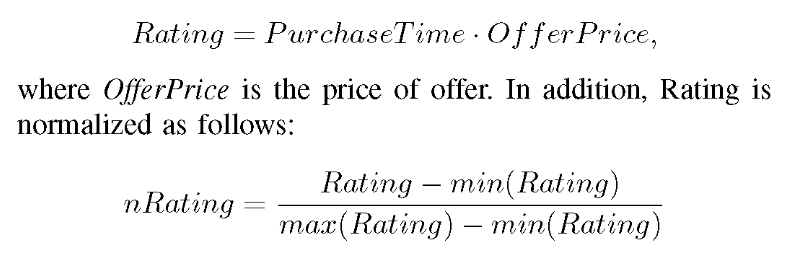
https://doi.org/10.1109/ICCE48956.2021.9352111, 2021  (Pham, C. D., Anh Chu, T., Pham, H. H., Linh Dao, M., Pham, T. S., Hung Trinh, V., & Nguyen, D. H. A recommendation system for offers in telecommunications)
- http://www.utstat.toronto.edu/~brunner/DataAnalysisText/Interactions.pdf

### More advanced methods
- Dimension reduction approaches?

### Usage ratings for year-month

In [16]:
pivot_voice_usage_info = pivot_voice_usage_info.drop(['call_count','duration'], axis=1)
pivot_voice_usage_info

,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
year-month,,,,,,,,,,,,,
event_source.hash,,,,,,,,,,,,,
007400db8afa996e788d23986739f3db,1,0,0,0,0,0,0,0,0,0,0,0,0
009f305bf85a71012c0e343233e611ba,0,0,0,0,3,0,0,0,0,0,0,0,0
00cc5a820586ce291c0fa4c2a99a4816,0,0,0,0,0,0,0,0,0,0,4,1,0
011adeeaef79aeac706a2e7fc225e8f8,0,0,0,0,0,0,0,0,1,0,0,0,0
0201ee9b60de662cdd16c885f178feea,1,0,0,1,0,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe20b17a9573e4b7e765cc3098728f3d,0,0,0,0,0,0,0,0,0,6,0,3,0
fe4e907a21bb03842eb88d0c0d633ca8,0,3,8,8,3,3,8,12,8,3,4,0,0


In [17]:
pivot_voice_usage_info.T.reset_index(drop=True).T
pivot_voice_usage_info.columns=year_month_list

In [18]:
# scaling usage rating
scaler = MinMaxScaler()
for col in year_month_list:
    pivot_voice_usage_info[col] = scaler.fit_transform(pivot_voice_usage_info[col].values.reshape(-1,1))

<AxesSubplot:xlabel='year-month', ylabel='event_source.hash'>

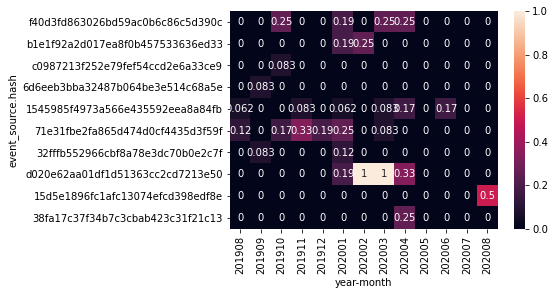

In [19]:
sns.heatmap(pivot_voice_usage_info[year_month_list].sample(n=10), annot=True)

In [20]:
pivot_voice_usage_info['Usage_Rating_Scaled'] = pivot_voice_usage_info[year_month_list].sum(axis=1)/len(year_month_list)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
event_source.hash,,,,,,,,,,,,,,
007400db8afa996e788d23986739f3db,0.0625,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004808
009f305bf85a71012c0e343233e611ba,0.0000,0.000000,0.000000,0.000000,0.1875,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.014423
00cc5a820586ce291c0fa4c2a99a4816,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.333333,0.083333,0.0,0.032051
011adeeaef79aeac706a2e7fc225e8f8,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.0,0.006410
0201ee9b60de662cdd16c885f178feea,0.0625,0.000000,0.000000,0.083333,0.0000,0.0000,0.166667,0.083333,0.000000,0.000000,0.000000,0.000000,0.0,0.030449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe20b17a9573e4b7e765cc3098728f3d,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0.0,0.057692
fe4e907a21bb03842eb88d0c0d633ca8,0.0000,0.250000,0.666667,0.666667,0.1875,0.1875,0.666667,1.000000,0.666667,0.250000,0.333333,0.000000,0.0,0.375000
ff445f580f7525bd9f1455d6b09704cd,0.0000,0.000000,0.000000,0.000000,0.0625,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004808


### Finding Outliers

<AxesSubplot:>

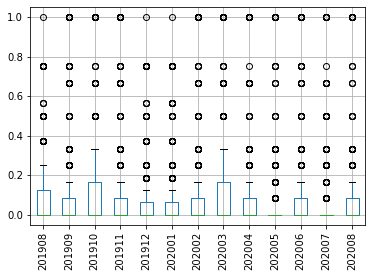

In [21]:
pivot_voice_usage_info.boxplot(column=[int(x) for x in year_month_list], rot=90)

<AxesSubplot:ylabel='year-month'>

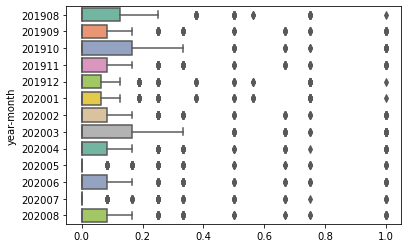

In [22]:
ax = sns.boxplot(data=pivot_voice_usage_info[[int(x) for x in year_month_list]], orient="h", palette="Set2")
ax

<AxesSubplot:ylabel='Density'>

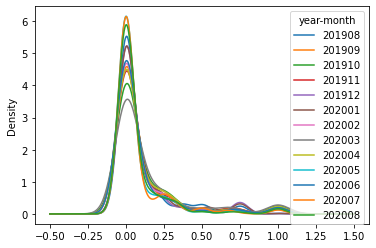

In [23]:
pivot_voice_usage_info[[int(x) for x in year_month_list]].plot(kind = 'density')

## Three quantitative methods commonly used in statistics for the detection of univariate outliers:
- Tukey’s box plot method
- Internally studentized residuals (AKA z-score method)
- Median Absolute Deviation method

### 1) Tukey’s box plot method
- Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.    
    
- IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile
- Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]
- Outer fence = [Q1–3*IQR, Q3+3*IQR]

In [24]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    outliers_prob_indexes = []
    outliers_poss_indexes = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob_indexes.append(index)
            outliers_prob.append(x)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss_indexes.append(index)
            outliers_poss.append(x)
    # returns indexes of the rows with outliers
    return outliers_prob, outliers_prob_indexes, outliers_poss, outliers_poss_indexes

In [25]:
pr_col_threshold = []
po_col_threshold = []
for col in year_month_list:
    pr_col, pr_col_indexes, po_col, po_col_indexes = tukeys_method(pivot_voice_usage_info, int(col))
    pr_col_threshold.append({col: {"threshold": min(pr_col), "count": len(pr_col)}})
    po_col_threshold.append({col: {"threshold": min(po_col), "count": len(po_col)}})
    print()
    print(f"Probable Outliers for {col}---->\n", pr_col)
    print(len(pr_col))
    print()
    print(f"Possible Outliers for {col}----->\n", po_col)
    print(len(po_col))
    print()


Probable Outliers for 201908---->
 [0.75, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.5, 0.75, 0.5, 0.75, 0.75, 0.75, 0.75, 0.5, 0.5, 0.5, 0.75, 0.5625, 0.75, 0.75, 0.5, 0.5, 0.75, 0.5, 0.5, 0.75, 0.75, 1.0, 0.5, 0.75, 0.5625, 0.5, 0.5, 0.5625, 0.5]
37

Possible Outliers for 201908----->
 [0.375, 0.75, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.5, 0.375, 0.375, 0.75, 0.5, 0.375, 0.75, 0.75, 0.375, 0.375, 0.75, 0.375, 0.75, 0.5, 0.375, 0.5, 0.375, 0.5, 0.75, 0.5625, 0.375, 0.375, 0.375, 0.75, 0.75, 0.5, 0.5, 0.375, 0.75, 0.375, 0.5, 0.5, 0.375, 0.75, 0.375, 0.75, 0.375, 1.0, 0.375, 0.5, 0.75, 0.375, 0.5625, 0.5, 0.5, 0.5625, 0.5]
56


Probable Outliers for 201909---->
 [1.0, 0.3333333333333333, 1.0, 0.5, 0.75, 1.0, 0.3333333333333333, 1.0, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 1.0, 0.6666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.75, 1.0, 1.0, 1.0, 0.3333333333333333, 1.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.75, 0.3333333333333

In [26]:
pr_col_threshold

[{201908: {'threshold': 0.5, 'count': 37}},
 {201909: {'threshold': 0.3333333333333333, 'count': 60}},
 {201910: {'threshold': 0.6666666666666666, 'count': 34}},
 {201911: {'threshold': 0.3333333333333333, 'count': 63}},
 {201912: {'threshold': 0.25, 'count': 69}},
 {202001: {'threshold': 0.25, 'count': 79}},
 {202002: {'threshold': 0.3333333333333333, 'count': 56}},
 {202003: {'threshold': 0.6666666666666666, 'count': 48}},
 {202004: {'threshold': 0.3333333333333333, 'count': 56}},
 {202005: {'threshold': 0.0, 'count': 517}},
 {202006: {'threshold': 0.3333333333333333, 'count': 59}},
 {202007: {'threshold': 0.0, 'count': 517}},
 {202008: {'threshold': 0.3333333333333333, 'count': 41}}]

In [27]:
po_col_threshold

[{201908: {'threshold': 0.375, 'count': 56}},
 {201909: {'threshold': 0.25, 'count': 78}},
 {201910: {'threshold': 0.5, 'count': 46}},
 {201911: {'threshold': 0.25, 'count': 89}},
 {201912: {'threshold': 0.1875, 'count': 98}},
 {202001: {'threshold': 0.1875, 'count': 105}},
 {202002: {'threshold': 0.25, 'count': 88}},
 {202003: {'threshold': 0.5, 'count': 63}},
 {202004: {'threshold': 0.25, 'count': 89}},
 {202005: {'threshold': 0.0, 'count': 517}},
 {202006: {'threshold': 0.25, 'count': 77}},
 {202007: {'threshold': 0.0, 'count': 517}},
 {202008: {'threshold': 0.25, 'count': 62}}]

### 2) Median Absolute Deviation method
- this method is highly limited as the distributions mean and standard deviation are sensitive to outliers. This means that finding one outlier is dependent on other outliers as every observation directly affects the mean.    
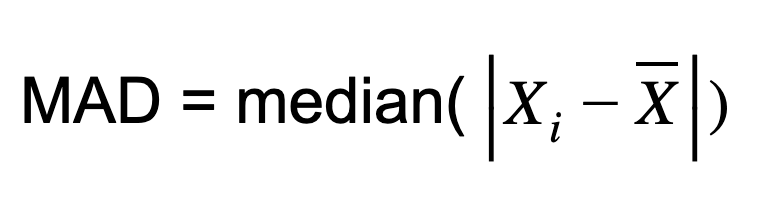

In [28]:
from scipy import stats

# MAD method
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [29]:
col_threshold = []
for col in year_month_list:
    outliers = mad_method(pivot_voice_usage_info, int(col))
    outlier_cols = pivot_voice_usage_info[int(col)].iloc[outliers]
    col_threshold.append({col: {"threshold" :min(outlier_cols), "count":len(outliers)}})
    print()
    print(f"Outliers for {col}---->\n", outlier_cols)
    print(len(outliers))


Outliers for 201908---->
 event_source.hash
007400db8afa996e788d23986739f3db    0.0625
0201ee9b60de662cdd16c885f178feea    0.0625
029b57551e576f248ff07c849db52fd6    0.3750
03b5d13a7949d99e793afdfe07dd73cb    0.0625
04ec40da46c6ca65064a371a0a695f74    0.0625
                                     ...  
f50e8a2522301fa447153e007a624011    0.2500
f98f6750211cfdc7fee9a826ff5293b4    0.1875
facfe99fff1a63941380ad952a055621    0.2500
ff7e0f4edb7b39b683b9134af37fc4d3    0.5000
ffd96f173d6cd683bf3384bdc2f99713    0.1875
Name: 201908, Length: 176, dtype: float64
176

Outliers for 201909---->
 event_source.hash
029b57551e576f248ff07c849db52fd6    0.083333
03b5d13a7949d99e793afdfe07dd73cb    0.166667
0480fbc41f1ab2d73ea50c0dda53b89e    0.083333
04ec40da46c6ca65064a371a0a695f74    0.166667
0598ebdbe1c730120b3c5504c9d90a9f    0.083333
                                      ...   
f6f97a90a742d6f3ee157c9e519c7242    0.250000
f852c66e165c8845bf24e759a33e0bfe    0.166667
facfe99fff1a63941380ad952a05562

<ipython-input-28-ab658f4f8d27>:8: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  mad = np.abs(stats.median_absolute_deviation(df))
<ipython-input-28-ab658f4f8d27>:16: RuntimeWarning: divide by zero encountered in double_scalars
  t = (v-med[index])/mad[index]
<ipython-input-28-ab658f4f8d27>:16: RuntimeWarning: invalid value encountered in double_scalars
  t = (v-med[index])/mad[index]


In [30]:
col_threshold

[{201908: {'threshold': 0.0625, 'count': 176}},
 {201909: {'threshold': 0.08333333333333333, 'count': 160}},
 {201910: {'threshold': 0.08333333333333333, 'count': 185}},
 {201911: {'threshold': 0.08333333333333333, 'count': 169}},
 {201912: {'threshold': 0.0625, 'count': 180}},
 {202001: {'threshold': 0.0625, 'count': 180}},
 {202002: {'threshold': 0.08333333333333333, 'count': 157}},
 {202003: {'threshold': 0.08333333333333333, 'count': 204}},
 {202004: {'threshold': 0.08333333333333333, 'count': 161}},
 {202005: {'threshold': 0.08333333333333333, 'count': 116}},
 {202006: {'threshold': 0.08333333333333333, 'count': 148}},
 {202007: {'threshold': 0.08333333333333333, 'count': 122}},
 {202008: {'threshold': 0.08333333333333333, 'count': 131}}]

In [31]:
sum_outlier = 0
for col in col_threshold:
    for key,val in col.items():
        sum_outlier += val["threshold"]
avg_outlier = sum_outlier / len(col_threshold)
pivot_voice_usage_info["Outlier"]=pivot_voice_usage_info.apply(lambda x : "YES" if x["Usage_Rating_Scaled"]> avg_outlier else "NO", axis=1)
print(avg_outlier)

0.07852564102564104


In [32]:
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier
event_source.hash,,,,,,,,,,,,,,,
007400db8afa996e788d23986739f3db,0.0625,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004808,NO
009f305bf85a71012c0e343233e611ba,0.0000,0.000000,0.000000,0.000000,0.1875,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.014423,NO
00cc5a820586ce291c0fa4c2a99a4816,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.333333,0.083333,0.0,0.032051,NO
011adeeaef79aeac706a2e7fc225e8f8,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.0,0.006410,NO
0201ee9b60de662cdd16c885f178feea,0.0625,0.000000,0.000000,0.083333,0.0000,0.0000,0.166667,0.083333,0.000000,0.000000,0.000000,0.000000,0.0,0.030449,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe20b17a9573e4b7e765cc3098728f3d,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0.0,0.057692,NO
fe4e907a21bb03842eb88d0c0d633ca8,0.0000,0.250000,0.666667,0.666667,0.1875,0.1875,0.666667,1.000000,0.666667,0.250000,0.333333,0.000000,0.0,0.375000,YES
ff445f580f7525bd9f1455d6b09704cd,0.0000,0.000000,0.000000,0.000000,0.0625,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004808,NO


In [33]:
# labling usage bins
bins = [0, 0.08, 0.3,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_voice_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_voice_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,,
007400db8afa996e788d23986739f3db,0.0625,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004808,NO,LOW
009f305bf85a71012c0e343233e611ba,0.0000,0.000000,0.000000,0.000000,0.1875,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.014423,NO,LOW
00cc5a820586ce291c0fa4c2a99a4816,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.333333,0.083333,0.0,0.032051,NO,LOW
011adeeaef79aeac706a2e7fc225e8f8,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.0,0.006410,NO,LOW
0201ee9b60de662cdd16c885f178feea,0.0625,0.000000,0.000000,0.083333,0.0000,0.0000,0.166667,0.083333,0.000000,0.000000,0.000000,0.000000,0.0,0.030449,NO,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe20b17a9573e4b7e765cc3098728f3d,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0.0,0.057692,NO,LOW
fe4e907a21bb03842eb88d0c0d633ca8,0.0000,0.250000,0.666667,0.666667,0.1875,0.1875,0.666667,1.000000,0.666667,0.250000,0.333333,0.000000,0.0,0.375000,YES,HIGH
ff445f580f7525bd9f1455d6b09704cd,0.0000,0.000000,0.000000,0.000000,0.0625,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004808,NO,LOW


In [34]:
# adding category "NO" 
pivot_voice_usage_info['Usage_Rating_Categorical'] = pivot_voice_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_voice_usage_info.loc[pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
pivot_voice_usage_info[(pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0)]

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,,


### Fina Result: Usage Ratings

In [35]:
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,,
007400db8afa996e788d23986739f3db,0.0625,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004808,NO,LOW
009f305bf85a71012c0e343233e611ba,0.0000,0.000000,0.000000,0.000000,0.1875,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.014423,NO,LOW
00cc5a820586ce291c0fa4c2a99a4816,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.333333,0.083333,0.0,0.032051,NO,LOW
011adeeaef79aeac706a2e7fc225e8f8,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.0,0.006410,NO,LOW
0201ee9b60de662cdd16c885f178feea,0.0625,0.000000,0.000000,0.083333,0.0000,0.0000,0.166667,0.083333,0.000000,0.000000,0.000000,0.000000,0.0,0.030449,NO,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe20b17a9573e4b7e765cc3098728f3d,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0.0,0.057692,NO,LOW
fe4e907a21bb03842eb88d0c0d633ca8,0.0000,0.250000,0.666667,0.666667,0.1875,0.1875,0.666667,1.000000,0.666667,0.250000,0.333333,0.000000,0.0,0.375000,YES,HIGH
ff445f580f7525bd9f1455d6b09704cd,0.0000,0.000000,0.000000,0.000000,0.0625,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004808,NO,LOW


In [36]:
pivot_voice_usage_info.to_csv("data/user_profile/VOICE_IDD_Outgoing_Usage_Categorical.csv")

# Phase 2

## Binnig by Location 

- 1. group by location columns
- 2. Bin by location and get counts

In [37]:
# bucketing by location
voice_location_info = voice_usage_info
voice_location_info['Location_Identifier'] = voice_location_info['msan'].astype(str)+ voice_location_info['location_code'].astype(str) +voice_location_info['equp_id'].astype(str) +voice_location_info['equp_index'].astype(str)
voice_location_info

,event_source.hash,call_count,duration,year-month,account_num.hash,rtom_code,location_code,msan,equp_id,equp_index,Location_Identifier
0,a59c2773afc5be902c52f6990f370bcf,1,565,201910,771c34ac5cc715fcb165b26fbf100e0c,R-DB,NL-HGW-NODE,MSAG5200-ISL,49128,1,MSAG5200-ISLNL-HGW-NODE491281
1,4c4675487bb19a93b735663cce8b33e9,1,226,201911,df1e4af0e56cd73433d876aa0bad1a0d,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1,MSAG5200-ISLND-PHG-NODE500241
2,a59c2773afc5be902c52f6990f370bcf,2,1315,202001,771c34ac5cc715fcb165b26fbf100e0c,R-DB,NL-HGW-NODE,MSAG5200-ISL,49128,1,MSAG5200-ISLNL-HGW-NODE491281
3,4c4675487bb19a93b735663cce8b33e9,3,151,201912,df1e4af0e56cd73433d876aa0bad1a0d,R-ND,ND-PHG-NODE,MSAG5200-ISL,50024,1,MSAG5200-ISLND-PHG-NODE500241
4,a59c2773afc5be902c52f6990f370bcf,2,111,202002,771c34ac5cc715fcb165b26fbf100e0c,R-DB,NL-HGW-NODE,MSAG5200-ISL,49128,1,MSAG5200-ISLNL-HGW-NODE491281
...,...,...,...,...,...,...,...,...,...,...,...
2084,26a87af2622ab681238a991a2c8ac33c,2,68,202004,822f5f61a25cdbedef1fbd6c8c5ee7e2,R-KI,KI-NODE,C300M,1066816,4,C300MKI-NODE10668164
2085,f74cb22c89ace83b0f9feefce6191b0d,1,566,201911,53ae8548575967652f586076eb2fb7ae,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,MSAG5200-ISLMT-AVR-NODE467161
2086,a56749c8566f8c41d2c406e0ca8f5ec1,3,200,202002,81727df83088cde5a0b9f48d082e1789,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,MSAG5200-ISLMT-AVR-NODE467161
2087,a56749c8566f8c41d2c406e0ca8f5ec1,1,270,202003,81727df83088cde5a0b9f48d082e1789,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,MSAG5200-ISLMT-AVR-NODE467161


In [38]:
voice_location_info = voice_location_info.drop_duplicates("event_source.hash", keep="last")
voice_location_info.shape

(517, 11)

In [39]:
user_location = voice_location_info[['event_source.hash','Location_Identifier']]
user_location

,event_source.hash,Location_Identifier
10,4c4675487bb19a93b735663cce8b33e9,MSAG5200-ISLND-PHG-NODE500241
13,007400db8afa996e788d23986739f3db,ZXDSL9806H-ISLKL-PRC-NODE482361
18,f40d3fd863026bd59ac0b6c86c5d390c,MSAG5200-ISLND-PHG-NODE500241
21,ac425214d19f951d8d4d5975a6bbaf7e,MSAG5200-ISLND-PHG-NODE500241
26,39ead78669bce1a8b4feb93fa3dfc13c,MSAG5200-ISLND-PHG-NODE500241
...,...,...
2082,256ca6fd748999e033e9ccd6b8535d82,MSAG5200-ISLMV-GDM-NODE482491
2084,26a87af2622ab681238a991a2c8ac33c,C300MKI-NODE10668164
2085,f74cb22c89ace83b0f9feefce6191b0d,MSAG5200-ISLMT-AVR-NODE467161
2087,a56749c8566f8c41d2c406e0ca8f5ec1,MSAG5200-ISLMT-AVR-NODE467161


In [40]:
user_location.to_csv("data/user_profile/VOICE_IDD_OUTGOING_Locations_of_Users.csv")

In [41]:
voice_location_info["User_Count"] = 1
voice_gropued_by_locations = voice_location_info.groupby(['Location_Identifier'], axis=0,as_index=False).sum()
voice_gropued_by_locations = voice_gropued_by_locations[['Location_Identifier','User_Count']]

<ipython-input-41-46e54884d952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_location_info["User_Count"] = 1


In [42]:
voice_gropued_by_locations

,Location_Identifier,User_Count
0,C300MHT-NE-NODE8152461,2
1,C300MIDH-IDJ-NODE11065541,9
2,C300MKI-NODE10668164,17
3,C300MNW-MEE-NODE18887751,7
4,C300MTP-NODE8700911,2
5,C300MVH-NODE9874041,1
6,MA5603TAD-SRV-NODE10224991,2
7,MSAG5200-ISLBZ-NODE435881,3
8,MSAG5200-ISLGE-NODE5577981,2
9,MSAG5200-ISLHC-NAP-NODE478721,2


In [43]:
voice_gropued_by_locations.to_csv("data/user_profile/VOICE_IDD_Outgoing_Users_Count_by_Location.csv")

<AxesSubplot:>

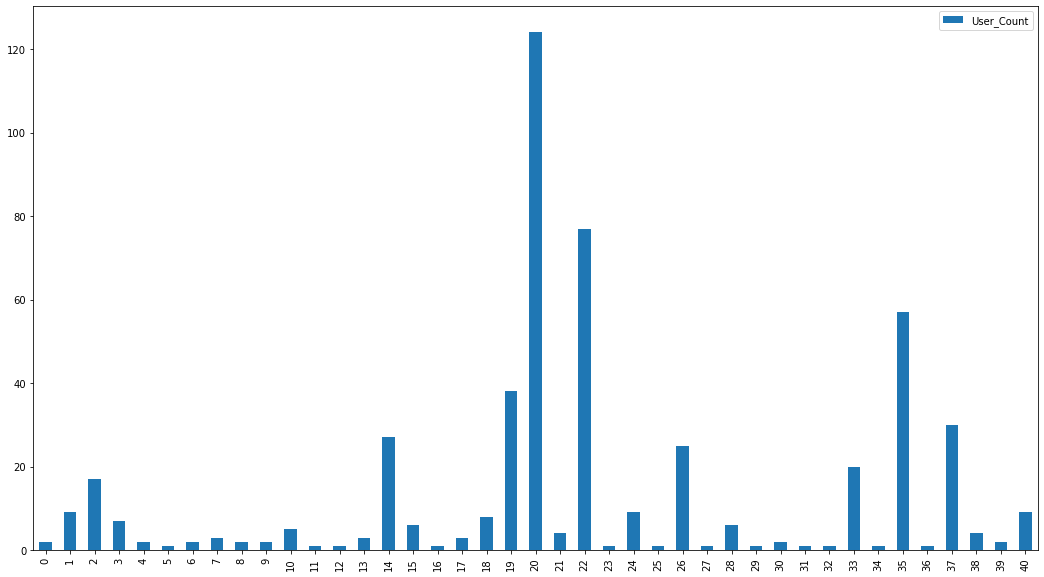

In [44]:
voice_gropued_by_locations.plot(kind="bar", figsize=(18,10),xticks=voice_gropued_by_locations.index)